# Home Loan Approval Prediction using Machine Learning| Python (pandas, numpy, matplotlib, seaborn, sklearn )

Home loan approval prediction project is completed using following steps:

1. Performed an Exploratory Data Analysis (EDA) to maximize insight into data using visualization 
2. Cleaned and pre-processed data by filling missing values and removing outliers to improve data quality
3. Used feature engineering for creating new input features and correlation matrix for dimension reduction which improved    model performance
4. Home loan approval prediction for a loan applicant using machine learning algorithms such as Logistic regression, Decision tree, Random forest, and Naive Bayesian 
5. Evaluated models using confusion matrix to identify the best predictive model

## Business Problem

Build the robust model for banks and finance companys to predict which customer will repay the loan or not in order to minimize the risk of loan default

## Hypothesis/Assumptions

Hypothesis is an idea or explanation for something that may be true but has not yet been completely proved.Based on dataset I will try to validate follwing hypothesis:

1. Income:Applicants with high incomes have high chances of repaying the loan and hence high chances of loan approval
2. Education:Applicants who are highly educated have high chanes of loan approval
3. Clear credit history:Applicants who has great history of returning their debts have high chances of loan approval
4. Loan amount:lower the loan amount,chances are high of loan approval
5. Loan term: Shorter the term,chances are high of loan approval 
 

# Performing Exploratory Data Analysis(EDA)

I will summarize main characteristics of data using Python programming language and different visualization libraries in Python

In [1]:
# Import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Safe side create copy of original data because even if we lose the data data we still have original data available
train_original = train.copy()
test_original = test.copy()

In [4]:
# Target variable="Loan_status"
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#test data set do not have Target variable as we will predict that variable
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [7]:
# Columns in training dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Columns in testing dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
# Finding concise information about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


Our dataset fields are divided into 3 datatypes
1. int64: Means field has whole numerical values e.g. 'ApplicantIncome'
2. object: Means field has categorical values e.g.'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_status'
3. float64: Means field has decimal numerical values e.g. 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'


            

## Performing univariate analysis

### 1. Univariate analysis of categorical variables

Bar graph will show frequency distrubution in each category

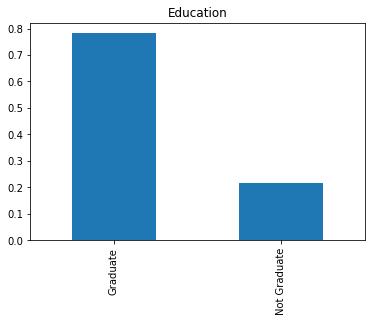

In [10]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.show()

Conclusion:In the given dataset approximately 78% of applicants are graduate and 22% of applicants are non_graduate

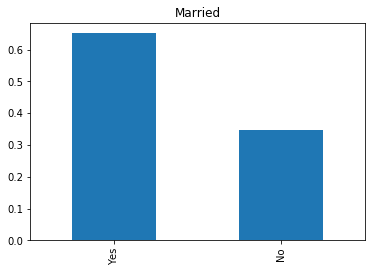

In [11]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.show()

Conclusion:In the given dataset approximately 65% of applicants are married and 35% of applicants are single

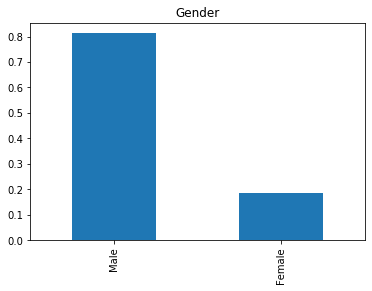

In [12]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')
plt.show()

Conclusion:In the given dataset approximately 80% of applicants are male and 20% of applicants are female

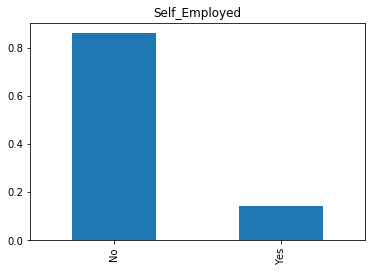

In [13]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.show()

Conclusion:In the given dataset approximately 85% of applicants are not self employed and 15% of applicants are self employed

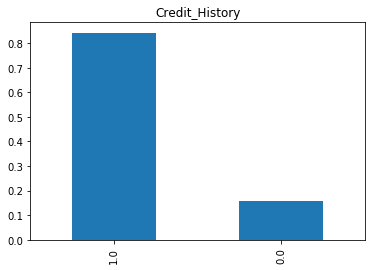

In [14]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

Conclusion:In the given dataset approximately 85% of applicants payed debts and 15% of applicants didn't payed debts

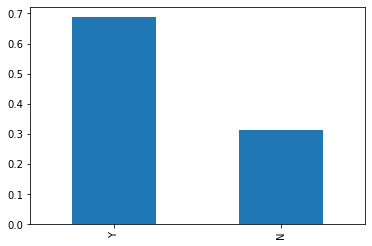

In [15]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()
plt.show()

Conclusion:In the given dataset approximately 68% of applicants are approved for loans and 32% of applicants are rejected

### 2. Univariate analysis for ordinal fields

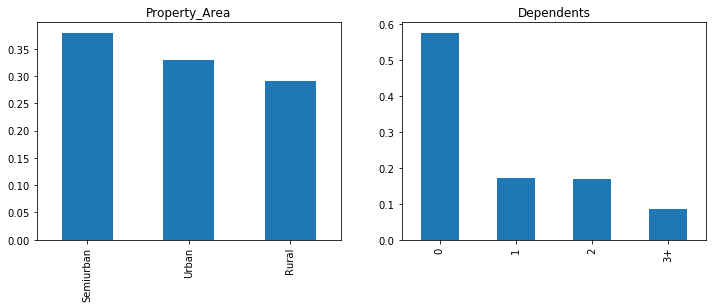

In [16]:
plt.subplot(121)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.subplot(122)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')
plt.show()

Conclusion:
1. Maximum applicants are from semi-urban area and lowest applicants are from rural areas
2. Majority of applicants did not have any dependant

### 3. Univariate analysis for numerical fields

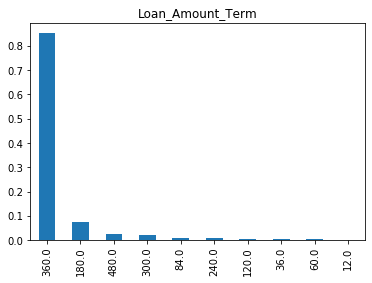

In [17]:
#Loan_Amount_Term field is discrete field
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')
plt.show()

Conclusion: In the given dataset near about 85% applicants applied for loan having loan amount term of 360 months

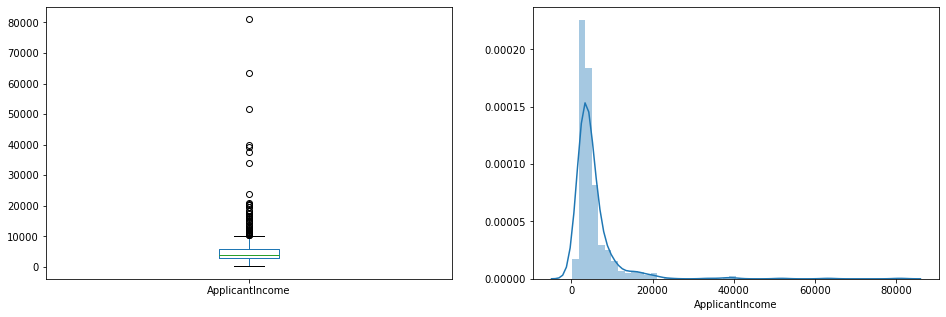

In [18]:
plt.subplot(121)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(122)
sns.distplot(train['ApplicantIncome']);
plt.show()

Conclusion:
   1. From boxplot we can infer that a lot of outliers are present in the Applicant income field.Means there is a lot of           difference in income level of applicants this might be due to difference in education level
   2. From histogram we can infer that distribution of income is right skewed.

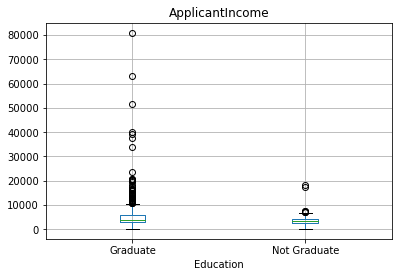

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
plt.show()

Conclusion: From above boxplot we can infer that applicants which are graduate have different range of salaries and that are visible as outliers in that field

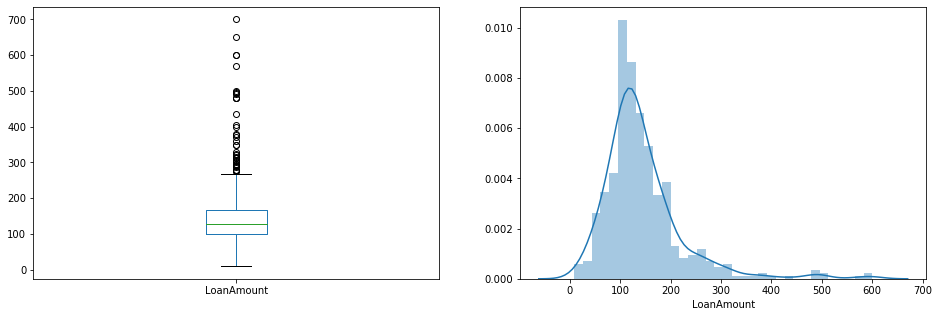

In [20]:
plt.subplot(121)
df=train.dropna()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.subplot(122)
sns.distplot(df['LoanAmount']);
plt.show()

Conclusion: LoanAmount field has lot of outliers and is not normaly distributed [It is right skewed]

## Bivariate analysis

Bivariate analysis is statistical technique to determine relation between two variables and test the hypothesis

### 1. Categorical Independent Variable vs Target Variable

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


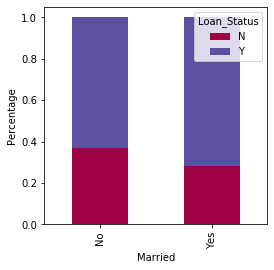

In [21]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, colormap='Spectral',figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Conclusion:Loan approval is higher for married applicants

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


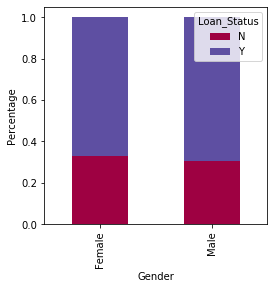

In [22]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True,colormap='Spectral', figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Conclusion: Loan approval and rejection proportion is same for male and female applicants

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


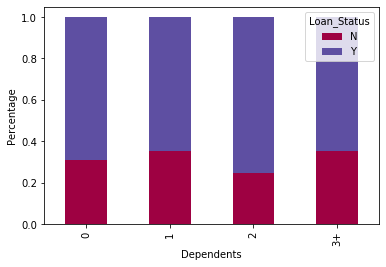

In [23]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral')
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Conclusion:Proportion of loan approval is higher where applicants has 2 dependants

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


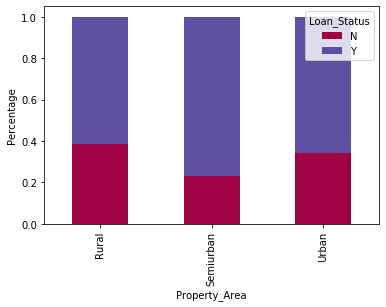

In [24]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral')
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

Conclusion: Proportion of loan approval is higher for applicants in semi-urban area

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


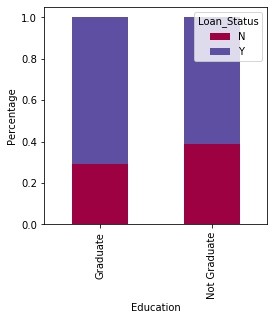

In [25]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral',figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Conclusion:Loan approval rate is higher for graduate applicants 

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


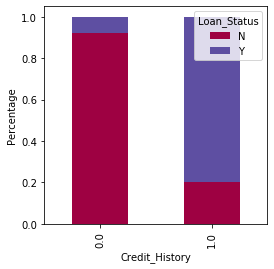

In [26]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral', figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Conclusion: Credit history has huge impact on loan approval.If applicants history shows that he has repayed debts then chances are high of loan approval

### 2.Numerical Independent Variable vs Target Variable

In [27]:
# For understanding impact of average income on target variable we need to create bins for income level
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [28]:
# check "Income_bin" field added into the train dataset
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


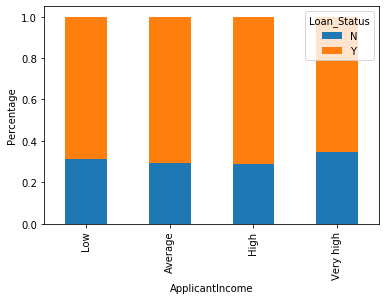

In [29]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Conclusion:Proportion of loan approval to rejection is same accross all bins means income level has not any impact on loan approval.It contradicts our hypothesis [If income level is high chances are high of loan approval]

In [30]:
# Co-applicants income vs Target variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

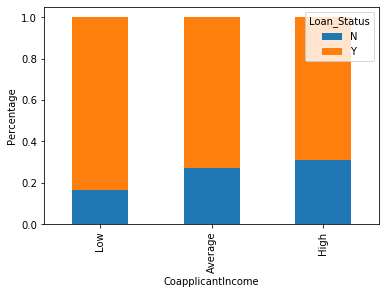

In [31]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

Conclusion: From above we can infer that if co-applicants income is low then chances are high of approval which does not look accurate result.This behavior is due to that most applicants have 0 dependents and hence their co-applicants income is 0.Hence loan approval is not depend on co-applicants income.

#### Perform feature engineering by creating total_income column

In [32]:
# Applicants total income is addition of applicants and co-applicants income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [33]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

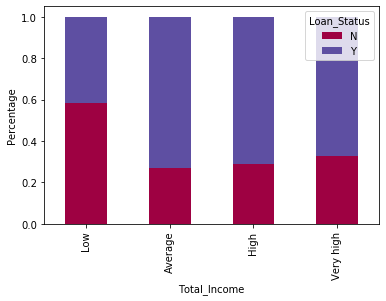

In [34]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral')
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Conclusion:This proves our hypothesis that high total income of applicants have higher approval rate

In [35]:
#Loan amount vs target variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

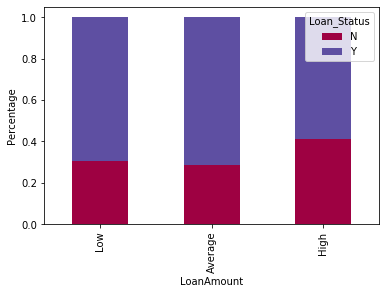

In [36]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,colormap='Spectral')
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Conclusion: From above bar chart we can say that our initial hypothesis is proved that lower the loan amount higher the loan approval

In [37]:
#Drop all bins that we have created for data analysis
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

# Data cleaning and preprocessing

### 1.Bring data in correct format for calculation


No of dependants field has 3+ value,we need to remove + sign and make values in correct format


In [38]:
#replace 3+ with 3
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [39]:
# In Loan_status field convert 'N' with 0 and 'Y' with 1 for mathematical calculations
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [40]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


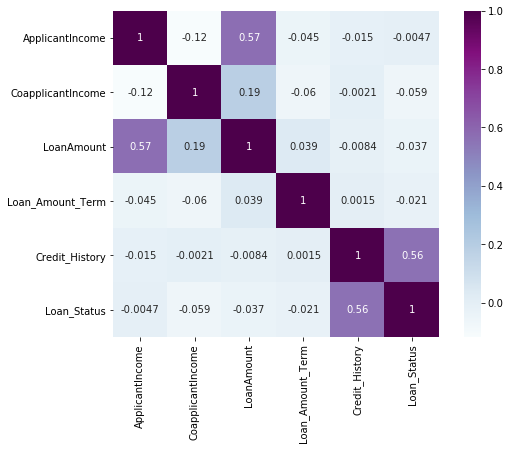

In [41]:
#Now we will use Pearson's correlation to find co-relation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)
matrix

Conclusion: In above Heat map co-relation between different variables is shown by color variations.Darker the color,higher the co-relation.Most co-related variables are as follows:
1. Loan_Status and credit_history [0.56]
2. Loan_Amount and applicant_income [0.57]
3. Co-applicant_income and loan_amount [0.19]

### 2.Imputing missing values

In [42]:
# Check missing values for all fields
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
#'Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History' these fields has some null values
# 1. Imputing missing values in categorical fields with mode
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [44]:
# 2. Imputing missing values in numerical fields with mean or median
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [45]:
# Earlier in Exploratory data analysis we saw that "Loan_Amount" field has outliers. So We can use median to replace null values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [46]:
#Check train dataset for null values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Conclusion: We imputed all null values using mode,median

In [47]:
# Now we need to impute missing values in test dataset using mode and median of training dataset
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [48]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Conclusion: We have imputed null values in test dataset

### 3. Outlier treatment

Presence of outliers affects the mean and standard deviations and hence affects the distribution of the data.In loan amount field values are right skewed.One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Text(0.5, 1.0, 'Test')

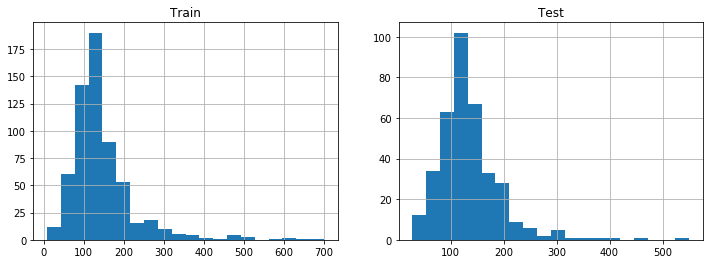

In [49]:
# Loan_amount value distribution before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [50]:
#Use Log-transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

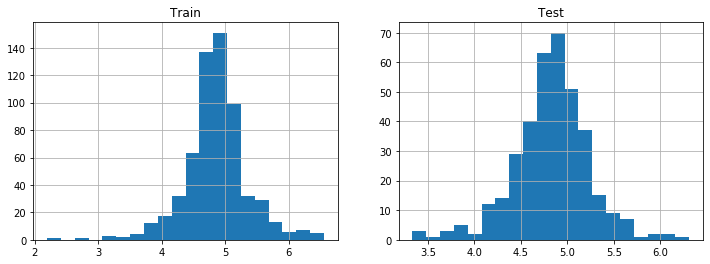

In [51]:
# Loan_amount value distribution after log transformation
ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

Conclusion: Now our loan_amount field has values which are normally distributed

# Build model using machine learning algorithms such as Logistic regression, Decision tree, Random forest, and Naive Bayesian

# 1.Model building using Logistic Regression

In [52]:
#Loan_id field does not have impact on prediction of target variable/target field hence we can drop that field
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)
#We can seperate independant variables from target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status
#We can convert categorical variables into numerical variables for statistical calculations
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [53]:
# import library
from sklearn.model_selection import train_test_split

In [54]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# make prediction
pred_cv = model.predict(x_cv)

In [58]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.827027027027027

Our model is 82% accurate means we have predicted 83% applicants status correctly

### Lets evaluate model using confusion matrix

[[ 23  28]
 [  4 130]]
0.827027027027027


Text(33.0, 0.5, 'True')

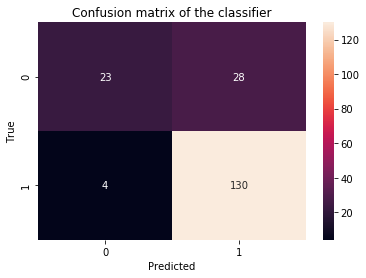

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, pred_cv)
accuracy=accuracy_score(y_cv, pred_cv)
print(cm)
print(accuracy)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')



In [60]:
# Now lets make prediction for test dataset
pred_test = model.predict(test)
pred_test[:100]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
# Create and empty data frame and fill the Loan_ID and Loan_Status 
submission = pd.DataFrame(columns=['Loan_ID', 'Loan_Status'])
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# take a look at the submission result
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


Thus using logistic regression we have predicted the status of the applicants which is 82% accurate

### Creating new features that might affect target variable (Feature Engineering)

In [62]:
#1.Total income:Idea behind creating this variable is that if total income is high then chances of approval are high
#2.EMI:Equated Monthly Installment,idea behind creating this variable is that if EMI amount is small then chances of laon approvals are high
#3.Balance income:(Total income-EMI amount) idea behind creating this variable is that if balance is high then chances of approvals are high
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

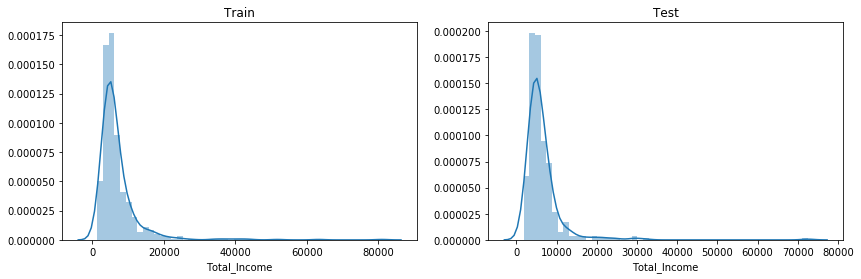

In [63]:
# Observe distribution of total income before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

As we can say that the distribution is right skewed, we can make it normal distribution using log transformation

Text(0.5, 1.0, 'Test')

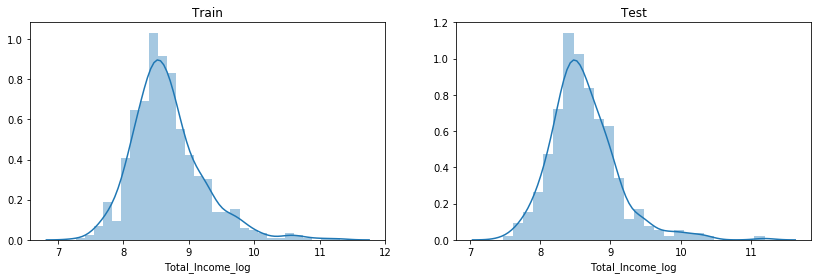

In [64]:
# Perform log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

# Observe distribution of total income after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

As we can say that total income is normaly distributed hence it will affect on increasing accuracy of model.

Text(0.5, 1.0, 'Test')

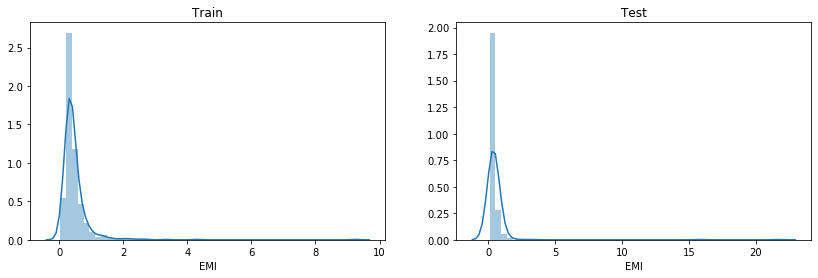

In [65]:
#2.Now we will create EMI variable
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# Plot the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Text(0.5, 1.0, 'Test')

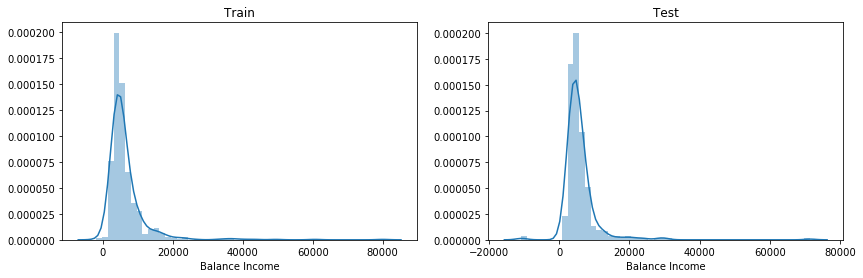

In [66]:
# 3. Now we will create Balance variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

# Observe  distribution of EMI before log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

1. Total income variable is highly correlated with applicant income and co-applicant income
2. EMI variable is highly correlated with  loan_amount and loan_amount_term
As we all know that higly correlated variables can create noise in the dataset hence we need to remove applicant income,co-applicant income,loan_amount and loan_amount_term from dataset

In [67]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# 1. Building model using logistic regression after feature engineering

In [70]:
# X has all independant variables and y has target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status   


In previous selection we used train_test_split but now we will use StratifiedKFold to split the data.StratifiedKFold each fold contains roughly the same proportions of the different types of class labels
Note:Accuracy might change from previous model results 

In [71]:
from sklearn.model_selection import StratifiedKFold

In [72]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459

Mean validation accuracy:  0.7214314274290283


Our new accuracy of model using logistic regression is 72%.

In [74]:
# Add predicted values
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID'] 
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 2.Building model using Decision tree

In [76]:
from sklearn import tree

#Decision tree model with 5 folds of cross validation.
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7149140343862455


Accuracy of the model using Decision tree is 71%

In [87]:
# Finding Applicants status whether loan is approved or not
submission['Loan_Status'] = pred_test            
submission['Loan_ID']=test_original['Loan_ID'] 

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 3. Building model using Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7540983606557377

Mean validation accuracy:  0.7849660135945622


### Get the optimized parameters using GridSearchCV

In [79]:
# import library
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# fit the grid search model
grid_search.fit(x_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [80]:
#Now grid search model is fit we can search for best parameters/optimized parameters
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [81]:
# Now we will build model using Random Forest having max_depth=5 and n_estimators=41
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7786885245901639

Mean validation accuracy:  0.8077702252432362


Wow as we can see accuracy of model using Random Forest increased from 78% to 80.77%

In [86]:
# Finding Applicants status whether loan is approved or not
submission['Loan_Status'] = pred_test            
submission['Loan_ID']=test_original['Loan_ID'] 

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


### Finding the most important features for finding solution of the problem


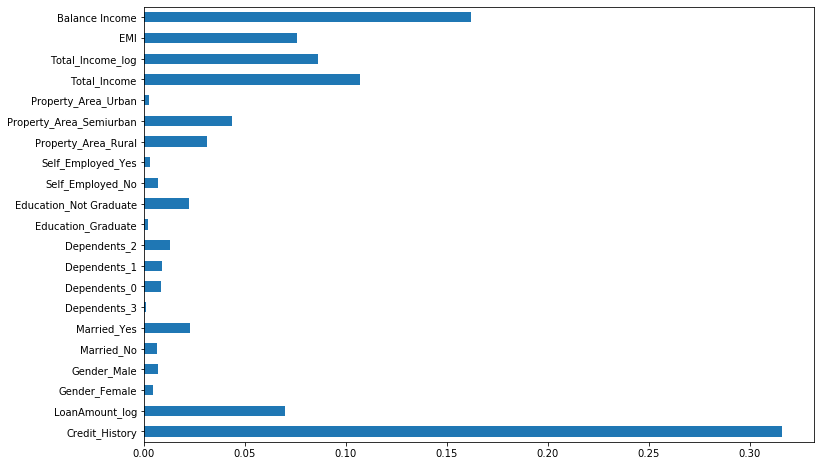

In [82]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

Conclusion: From above bar graph we can say that Credit history,Balance income,Total income,EMI these are top important features to find target variables
    

# 4.Building model using Naive Bayes classifiers

In [84]:
from sklearn.naive_bayes import GaussianNB


mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GaussianNB()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7398373983739838

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.7850193256030921


Mean accuracy of the model using Naive Bayes classifiers is 78.50%

In [85]:
# Finding Applicants status whether loan is approved or not
submission['Loan_Status'] = pred_test            
submission['Loan_ID']=test_original['Loan_ID'] 

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Conclusion

We solve the classification problem of predicting the loan approval status of the applicants using following machine learning algorithms in python programming language:

1. Logistic regression (accuracy=72%)
2. Decision tree (accuracy=71%)
3. Random forest (accurcy=apprx. 81%)
4. Naive Bayes classifiers (accuracy=78.50%)

After tuning parameters in Random forest algorithm we got the highest accuarcy level of 81%.